In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 변경
plt.rcParams['axes.unicode_minus'] = False     # 마이너스부호 깨짐 방지

In [3]:
print('-'*50)

--------------------------------------------------


# 과제물 오답노트

### 01. 데이터셋에 대한 정보를 확인하시오. 몇 개의 행과 몇 개의 컬럼으로 구성되어 있는가?
```이름.shape[/*num*/]```사용

### 05. 인덱스 기준 2행 4열의 값을 확인하시오.
인덱스 기준 n행 m열 : ```df.iloc[n,m]```

### 06. 앞쪽 5명의 탑승객에 대해 선실, 성별, 나이, 생존 여부를 출력하시오.
행,열 슬라이싱 : ```df.loc[:n ,[/*m array*/]]```

### 07. 나이가 60세 이상인 승객의 성별, 나이, 생존 여부를 출력하시오.
열값 가져오기 : ```이름.열이름```

### 10. 전체 승객 수 대비 생존자 비율을 구하시오.
count함수 사용 : ```df.loc[df.alive=='yes','alive'].count() / df.alive.count()```

### 11. 생존한 승객 중 가장 나이가 어린 승객의 성별과 나이를 출력하시오.
min함수 사용 : ```df.loc[(df.alive=='yes')&(df.age==df.age.min()), ['sex','age']]```

### 19. df2에서 선실 등급을 제외한 나머지 컬럼 데이터를 출력하시오.
```df2.loc[:, ~df2.columns.isin(['pclass'])]```

# Ch05-1 오답노트
### 도수 분표
* ```value_counts()```
### 화면 분할 정의 열이나 행만 나누면
```
fig, axes = plt.subplots(nrows=1, ncols=2)  # 화면 분할 정의
fd.plot.bar(ax=axes[0])  # 막대그래프
fd.plot.pie(ax=axes[1])  # 원그래프
```

# Ch05-2 오답노트
### 특정 컬럼만 추출
```house_price = pd.read_csv('./data/BostonHousing.csv')['medv']```
### 사분위수 나누기
(아래 코드 참고)

# Ch05-3 오답노트
(아래 코드 참고)


# 과제 코드

In [4]:
df = sns.load_dataset('titanic')

In [5]:
# 01. 데이터셋에 대한 정보를 확인하시오. 몇 개의 행과 몇 개의 컬럼으로 구성되어 있는가?

print(f"rows : {df.shape[0]}")
print(f"columns : {df.shape[1]}")

rows : 891
columns : 15


In [6]:
# 05. 인덱스 기준 2행 4열의 값을 확인하시오.

print(f"row 2 column 4 : {df.iloc[2,4]}")

row 2 column 4 : 0


In [7]:
# 06. 앞쪽 5명의 탑승객에 대해 선실, 성별, 나이, 생존 여부를 출력하시오.

df.loc[:4 ,['pclass','sex','age','alive']]

,pclass,sex,age,alive
0,3,male,22.0,no
1,1,female,38.0,yes
2,3,female,26.0,yes
3,1,female,35.0,yes
4,3,male,35.0,no


In [8]:
# 07. 나이가 60세 이상인 승객의 성별, 나이, 생존 여부를 출력하시오.

df.loc[df.age >= 60 ,['sex','age','alive']].head(3)

,sex,age,alive
33,male,66.0,no
54,male,65.0,no
96,male,71.0,no


In [9]:
# 10. 전체 승객 수 대비 생존자 비율을 구하시오.

print(f"alive rate : {df.loc[df.alive=='yes','alive'].count() / df.alive.count()}")

alive rate : 0.3838383838383838


In [10]:
# 11. 생존한 승객 중 가장 나이가 어린 승객의 성별과 나이를 출력하시오.

df.loc[(df.alive=='yes')&(df.age==df.age.min()), ['sex','age']]

,sex,age
803,male,0.42


In [11]:
# 16. 나이 등급(age_class) 컬럼을 df2에 추가하시오.
# 40세 미만이면 나이 등급은 ‘Low’, 40세 이상이면 ‘High’로 설정하고 추가된 내용을 확인하시오.

df2 = df.loc[:,['pclass','sex','age','alive']].copy()
df2['age_class'] = np.where(df2['age'] < 40, 'Low', 'High')
df2.dropna().head(3)

,pclass,sex,age,alive,age_class
0,3,male,22.0,no,Low
1,1,female,38.0,yes,Low
2,3,female,26.0,yes,Low


In [12]:
# 19. df2에서 선실 등급을 제외한 나머지 컬럼 데이터를 출력하시오.

df2.loc[:, ~df2.columns.isin(['pclass'])].head(3)

,sex,age,alive,age_class
0,male,22.0,no,Low
1,female,38.0,yes,Low
2,female,26.0,yes,Low


# Ch05-2 코드

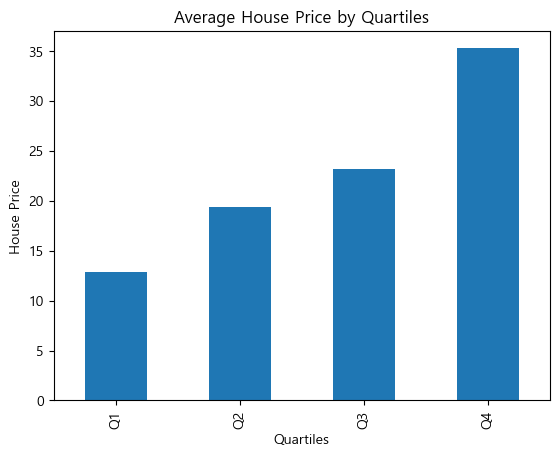

In [13]:
house_price = pd.read_csv('./data/BostonHousing.csv')['medv']

# Q3 사분위수를 기준으로 4개 구간의 집값 평균을 구하고 이를 막대그래프로 시각화하시오.
quan = house_price.quantile([0.25, 0.5, 0.75])
bins = [house_price.min(), quan[0.25], quan[0.5], quan[0.75], house_price.max()]
labels = ['Q1', 'Q2', 'Q3', 'Q4']
grp = pd.cut(house_price, bins=bins, labels=labels)
avg = house_price.groupby(grp, observed=True).mean()
avg.plot.bar()
plt.xlabel('Quartiles')
plt.ylabel('House Price')
plt.title('Average House Price by Quartiles')
plt.show()

# Ch05-3 코드

In [14]:
df = pd.read_csv('./data/user_behavior_dataset.csv')
models = df['Device_Model'] # 스마트폰 모델 정보 (범주형 자료)
usage_time = df['App_Usage_Time'] # 앱사용 시간 (연속형 자료)

In [15]:
# Q1 모델별 도수분포표를 계산하여 md에 저장한 후, md의 내용을 출력하시오.
md = models.value_counts()
md

Device_Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [16]:
# Q2 md를 이용하여 모델별 점유율을 계산하고 출력하시오.
md / models.size

Device_Model
Xiaomi Mi 11          0.208571
iPhone 12             0.208571
Google Pixel 5        0.202857
OnePlus 9             0.190000
Samsung Galaxy S21    0.190000
Name: count, dtype: float64

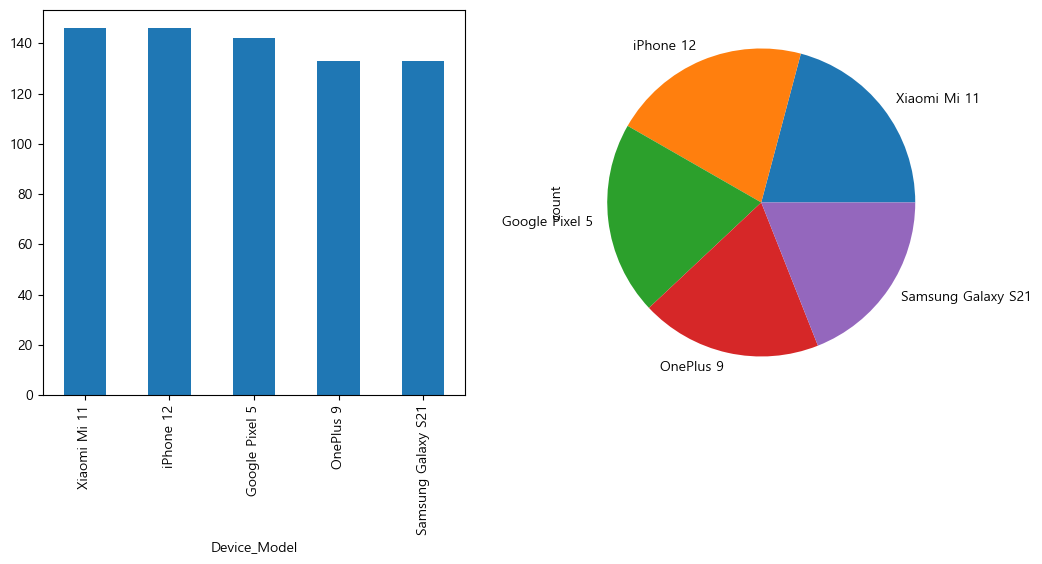

In [17]:
# Q3 md를 이용하여 막대그래프와 원 그래프를 작성하여 출력하시오.

# 화면 분할 정의
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 각 분할 영역에 그래프 작성하기
md.plot.bar(ax=axes[0])
md.plot.pie(ax=axes[1])

# 분할 그래프 화면에 나타내기 
plt.show()

In [18]:
# Q4 usage_time에 대해 평균, 중앙값, 표준 편차, 사분위수를 출력하시오.

print(f"평균: {usage_time.mean()}")
print(f"중앙값: {usage_time.median()}")
print(f"표준편차: {usage_time.std()}")
print(f"사분위수:\n{usage_time.quantile([0.25, 0.5, 0.75])}")

평균: 271.12857142857143
중앙값: 227.5
표준편차: 177.199484382662
사분위수:
0.25    113.25
0.50    227.50
0.75    434.25
Name: App_Usage_Time, dtype: float64


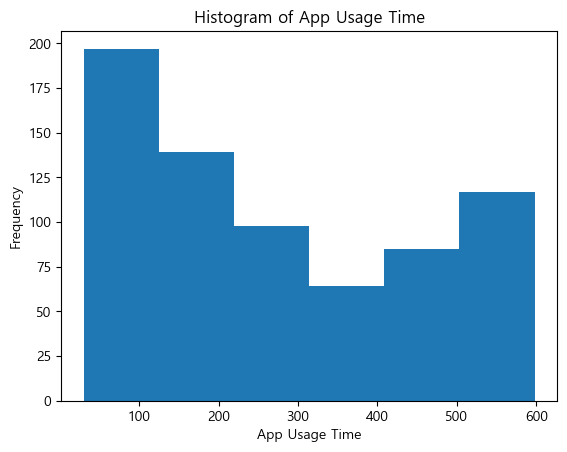

In [19]:
# Q5 usage_time에 대한 히스토그램을 작성하시오(막대 수: 6).

usage_time.plot.hist(bins=6,
    xlabel='App Usage Time',
    ylabel='Frequency',
    title='Histogram of App Usage Time')
plt.show()

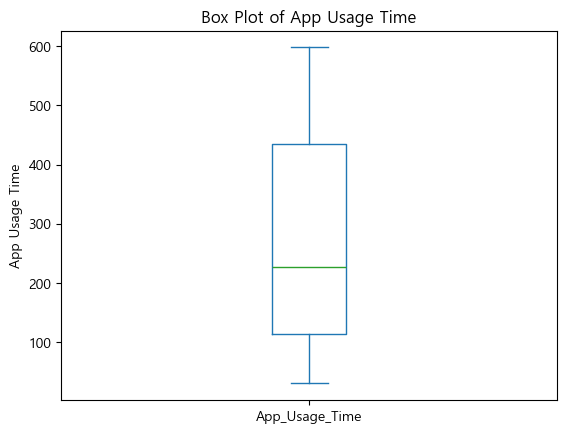

In [20]:
# Q6 usage_time에 대한 상자 그림을 작성하시오.

usage_time.plot.box(ylabel='App Usage Time',
                    title='Box Plot of App Usage Time')
plt.show()

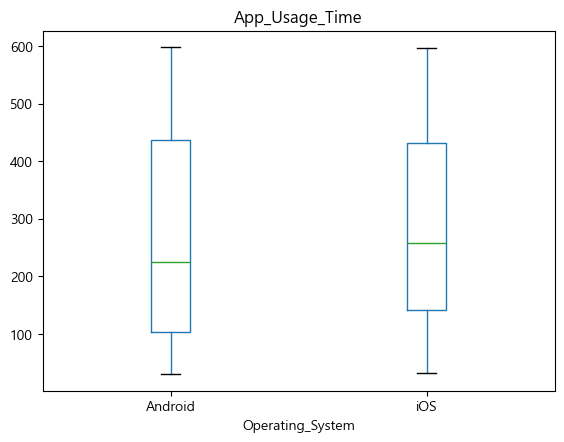

In [21]:
# Q7 user_behavior_dataset.csv의 Operating_System 컬럼을 이용하여
# usage_time의 상자 그림을 운영체제별로 나누어 작성하시오(코드5-10 참조).

df.boxplot(column='App_Usage_Time', by='Operating_System', grid=False)
plt.suptitle('')
plt.show()

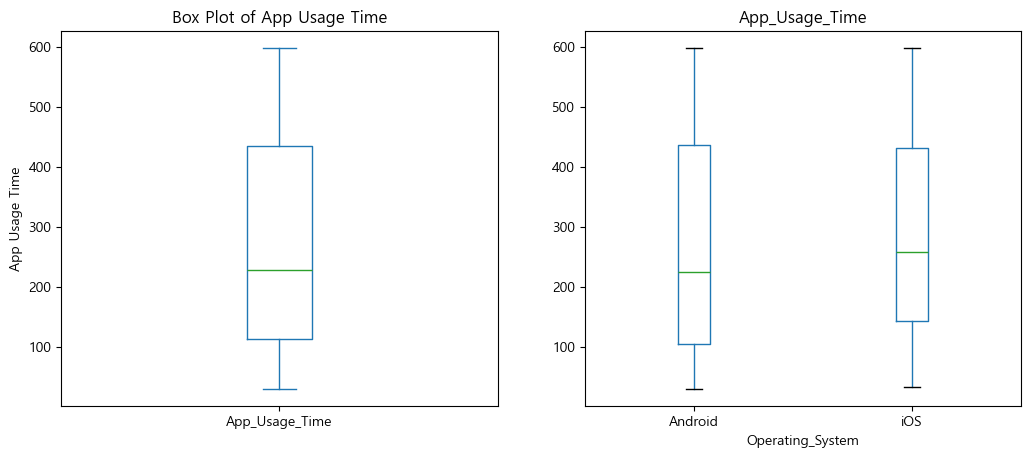

In [22]:
# Q8 5번과 6번의 그래프를 한 화면에 출력하시오(코드5-13 참조).

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
usage_time.plot.box(ylabel='App Usage Time',
                    title='Box Plot of App Usage Time',
                    ax=axes[0])
df.boxplot(column='App_Usage_Time', by='Operating_System', grid=False, ax=axes[1])
plt.suptitle('')
plt.show()